## UCI ADL Binary

Ordonez, F.J.; de Toledo, P.; Sanchis, A. Activity Recognition Using Hybrid Generative/Discriminative Models on Home Environments Using Binary Sensors. Sensors 2013, 13, 5460-5477.

### Description
This dataset comprises information regarding the ADLs performed by two users on a daily basis in their 
own homes. This dataset is composed by two instances of data, each one corresponding to a different 
user and summing up to 35 days of fully labelled data. Each instance of the dataset is described by 
three text files, namely: description, sensors events (features), activities of the daily living (labels). 
Sensor events were recorded using a wireless sensor network and data were labelled manually.

### House
Home setting: 4 rooms house  
Number of labelled days: 14 days  
	Labels (ADLs included):  Leaving, Toileting, Showering, Sleeping, Breakfast, Lunch, Dinner, Snack, Spare_Time/TV, Grooming  
Number of sensors: 12 sensors  
	Sensors: 	PIR: Shower, Basin, Cooktop
				Magnetic: Maindoor, Fridge, Cabinet, Cupboard
				Flush: Toilet
				Pressure: Seat, Bed
				Electric: Microwave, Toaster


In [1]:
import sys
sys.path.append("../..")
import pandas as pd
import matplotlib.pyplot as plt
from pyadlml.dataset import set_data_home, fetch_uci_adl_binary
set_data_home('/home/chris/code/adlml/data_home')

subject = 'OrdonezA'
data = fetch_uci_adl_binary(keep_original=True, cache=True, subject=subject)

In [2]:
data.df_activities.head()

,start_time,end_time,activity
0,2011-11-28 02:27:59,2011-11-28 10:18:11,Sleeping
1,2011-11-28 10:21:24,2011-11-28 10:23:36,Toileting
2,2011-11-28 10:25:44,2011-11-28 10:33:00,Showering
3,2011-11-28 10:34:23,2011-11-28 10:43:00,Breakfast
4,2011-11-28 10:49:48,2011-11-28 10:51:13,Grooming


In [3]:
data.df_devices.head()

,time,device,val
0,2011-11-28 02:27:59,Bedroom Bed Pressure,True
1,2011-11-28 10:18:11,Bedroom Bed Pressure,False
2,2011-11-28 10:21:24,Bathroom Cabinet Magnetic,True
3,2011-11-28 10:21:31,Bathroom Cabinet Magnetic,False
4,2011-11-28 10:21:44,Bathroom Basin PIR,True


## Activities

In [4]:
print('There were ', len(data.df_activities['activity'].unique()), 'activities recorded')

There were  9 activities recorded


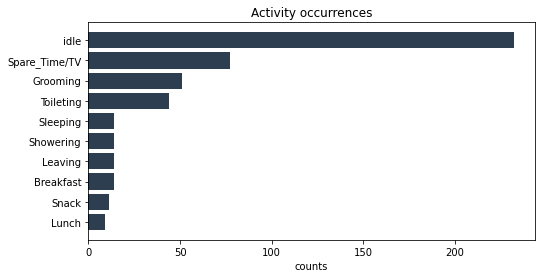

In [5]:
from pyadlml.dataset.plot.activities import hist_counts

idle = True
hist_counts(data.df_activities, idle=idle);

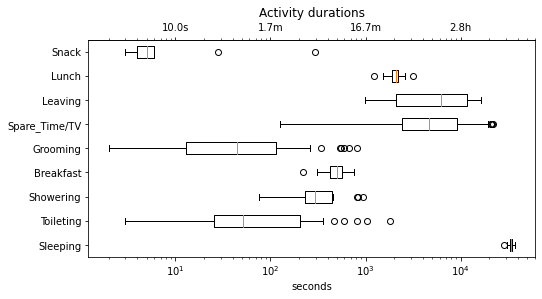

In [6]:
from pyadlml.dataset.plot.activities import boxplot_duration

idle = False
boxplot_duration(data.df_activities, idle=idle);

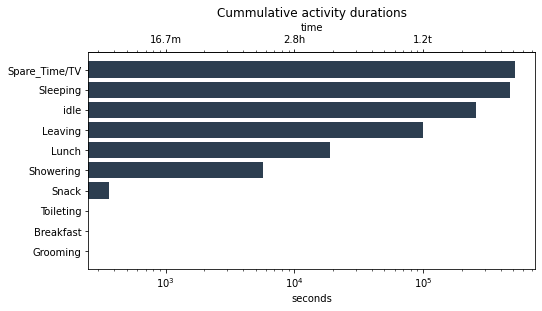

In [7]:
from pyadlml.dataset.plot.activities import hist_cum_duration

idle = True
y_scale = 'log'
hist_cum_duration(data.df_activities, y_scale=y_scale, idle=idle);

#### Transition Heatmap
$x_{72}$ should be read as first used the toilet and after that went to bed for a total of 46 times

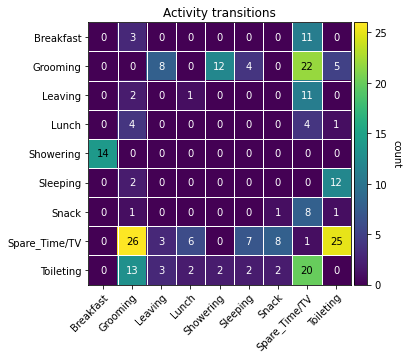

In [8]:
from pyadlml.dataset.plot.activities import heatmap_transitions

idle = False
z_scale = None #'log'
heatmap_transitions(data.df_activities, z_scale=z_scale, idle=idle);

## Devices

In [9]:
print('There are', len(data.df_devices['device'].unique()), 'devices recorded.')

There are 12 devices recorded.


In [10]:
from pyadlml.dataset.devices import device_rep1_2_rep2
rep2_nodrop, syn_acts = device_rep1_2_rep2(data.df_devices, drop=False)
rep2_drop = device_rep1_2_rep2(data.df_devices, drop=True)

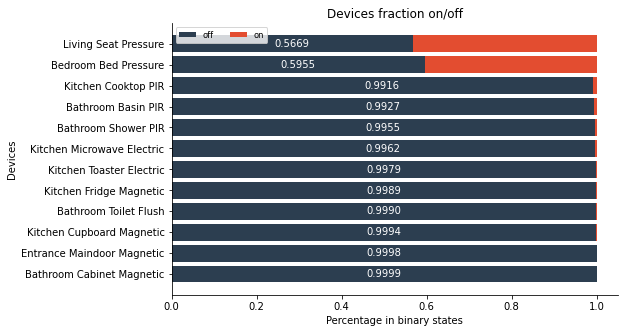

In [11]:
from pyadlml.dataset.plot.devices import hist_on_off
hist_on_off(rep2_nodrop);

As we can see a lot of devices are off the whole time.

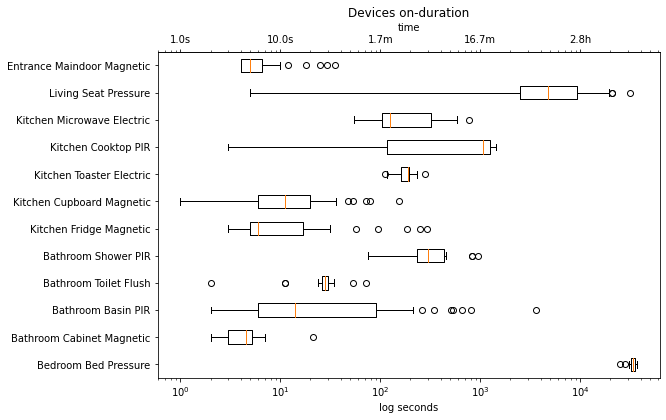

In [12]:
from pyadlml.dataset.plot.devices import boxplot_on_duration
boxplot_on_duration(rep2_nodrop);

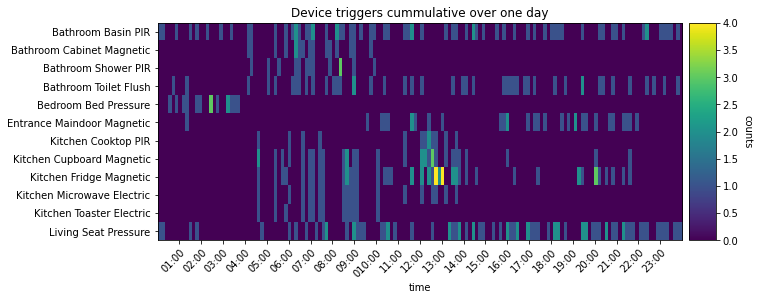

In [13]:
from pyadlml.dataset.plot.devices import heatmap_trigger_one_day
heatmap_trigger_one_day(data.df_devices, t_res='5m');

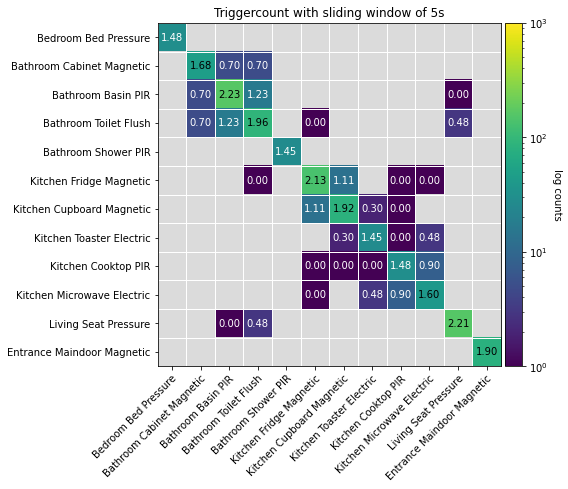

In [14]:
from pyadlml.dataset.plot.devices import heatmap_trigger_time

t_window = '5s'
z_scale = 'log'
heatmap_trigger_time(data.df_devices, t_window=t_window, z_scale=z_scale);

/home/chris/Desktop/code/adlml/pyadlml/venv_pyadlml/lib/python3.9/site-packages/dask/dataframe/core.py:4338: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta={'time': 'datetime64[ns]', 'Bathroom Basin PIR': 'object', 'Bathroom Cabinet Magnetic': 'object', 'Bathroom Shower PIR': 'object', 'Bathroom Toilet Flush': 'object', 'Bedroom Bed Pressure': 'object', 'Entrance Maindoor Magnetic': 'object', 'Kitchen Cooktop PIR': 'object', 'Kitchen Cupboard Magnetic': 'object', 'Kitchen Fridge Magnetic': 'object', 'Kitchen Microwave Electric': 'object', 'Kitchen Toaster Electric': 'object', 'Living Seat Pressure': 'object', 'td': 'timedelta64[ns]'})

  warnings.warn(meta_w

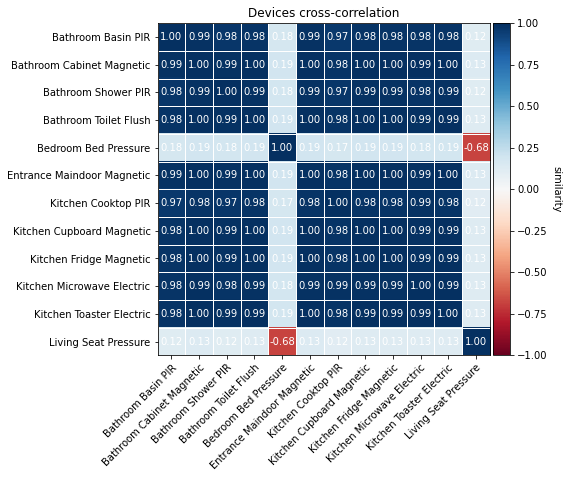

In [15]:
from pyadlml.dataset.plot.devices import heatmap_cross_correlation
heatmap_cross_correlation(data.df_devices);

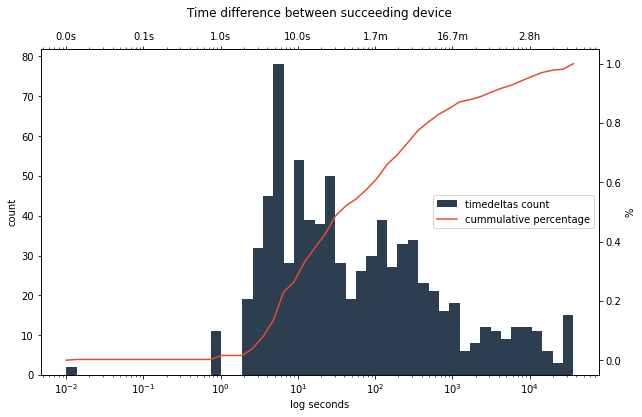

In [16]:
from pyadlml.dataset.plot.devices import hist_trigger_time_diff
hist_trigger_time_diff(data.df_devices);

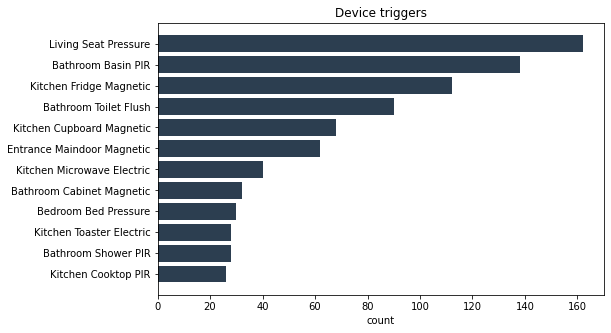

In [17]:
from pyadlml.dataset.plot.devices import hist_counts
hist_counts(data.df_devices);

# Activites ~ Devices


### Triggers

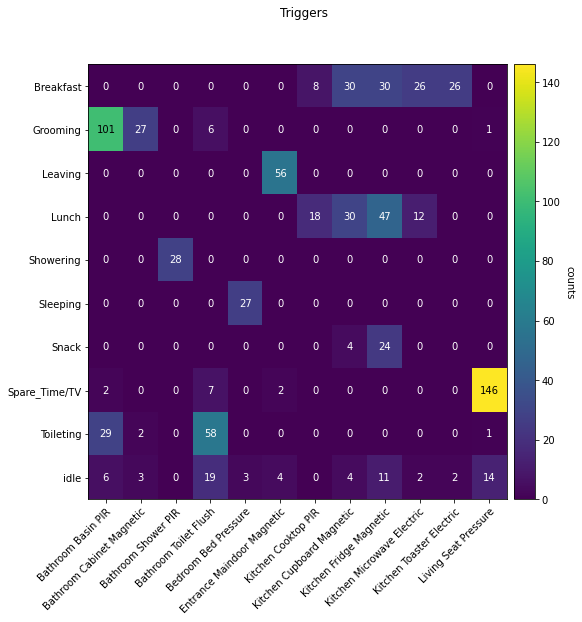

In [18]:
from pyadlml.dataset.plot import heatmap_contingency_triggers

idle = True
z_scale = None#'log'
heatmap_contingency_triggers(data.df_devices, data.df_activities, idle=idle, z_scale=z_scale);

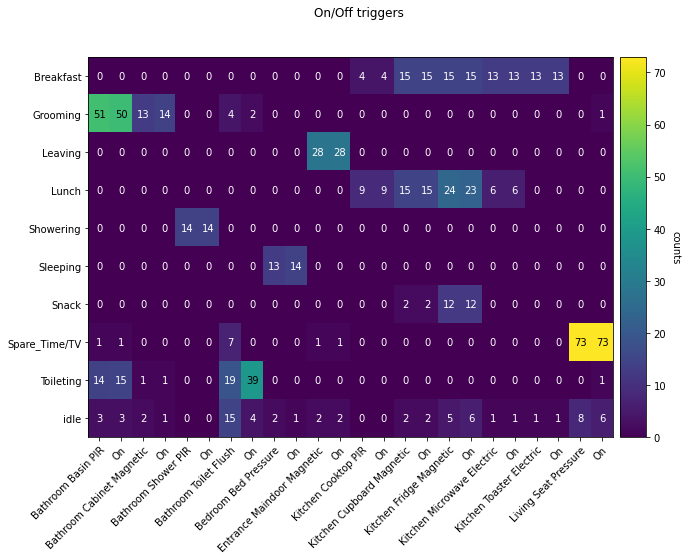

In [19]:
from pyadlml.dataset.plot import heatmap_contingency_triggers_01

idle = True
z_scale = None#'log'
heatmap_contingency_triggers_01(data.df_devices, data.df_activities, idle=idle, z_scale=z_scale);

## Duration

the overlap of the intervals is also interesting.

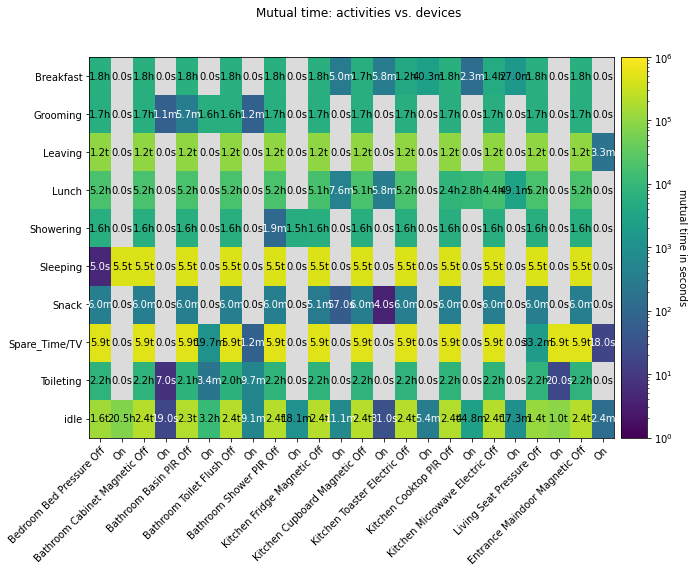

In [20]:
from pyadlml.dataset.plot import heatmap_contingency_overlaps

z_scale='log'
idle=True
heatmap_contingency_overlaps(data.df_devices, data.df_activities, z_scale=z_scale, idle=idle)

# Representations

There are different ways to represent our data. One way is to discretize the data into intervals.

- RAW representation _____|^^^^^^|______  
    is 1 whenever the sensor is 'on' and 0 otherwise 

- Changepoint representation ______|________|______  
    sensor gives a 1 to timeslices where the sensor reading changes

- LastFired representation ______|^^^^^^^^^  
    last sensor that changed state gives cont. 1

- Lagged representation
    the 

In [21]:
import sys
sys.path.append("../..")
import pandas as pd
import matplotlib.pyplot as plt
from pyadlml.dataset import set_data_home, fetch_uci_adl_binary
set_data_home('/home/chris/code/adlml/data_home')

subject = 'OrdonezA'
data = fetch_uci_adl_binary(keep_original=True, cache=True, subject=subject)

## RAW - representation

In [22]:
from pyadlml.preprocessing import DiscreteEncoder

enc_raw = DiscreteEncoder(rep='raw')
raw = enc_raw.fit_transform(data.df_devices)

In [23]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(raw)
lbls = enc_lbl.fit_transform(data.df_activities)

In [24]:
def check_raw(raw):
    # should not contain any  nan values
    assert not raw.isnull().values.any()
    
check_raw(raw)

In [25]:
from pyadlml.dataset.plot.raw import hist_activities

hist_activities(enc_lbl.inverse_transform(lbls), scale='log', figsize=(10,8))

ModuleNotFoundError: No module named 'pyadlml.dataset.plot.raw'

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'raw'

heatmap_contingency_01(raw, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(raw);

In [ ]:
# TODO sth. is wrong here
#from pyadlml.dataset.plot.raw import corr_devices_01
#corr_devices_01(raw)

## Changepoint - representation
Raw: _____|^^^^^^|______  

CP :  ______|________|______  

sensor gives a 1 to timeslices where the sensor reading changes

In [ ]:
idle = True
t_res = '60s'
rep = 'changepoint'

cp_enc = DiscreteEncoder(rep='changepoint', t_res=t_res)
cp = cp_enc.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(cp, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [ ]:
def check_changepoint(cp):
    # should not contain any  nan values
    assert not cp.isnull().values.any()

check_changepoint(cp)

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'Changepoint'

heatmap_contingency_01(cp, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(cp);

## LastFired - representation
______|^^^^^^^^^  

last sensor that changed state gives cont. 1

In [ ]:
t_res = '60s'
idle=True
rep = 'lastfired'

lf_enc = DiscreteEncoder(rep=rep, t_res=t_res)
lf = lf_enc.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(lf, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [ ]:
def check_lastfired(lf):
    # should not contain any  nan values
    assert not lf.isnull().values.any()
    
    # each row has to have exactly one device being on
    for row in lf.iterrows():
        assert 1 == row[1].values.sum()

check_lastfired(lf)

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'LastFired'

heatmap_contingency_01(lf, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(lf);

## Image - representation

a lot of timeseries can be represented as images. There are good algorithms for images available. There are Recurrence Plots (RP), Gramian Angular Field (GAF) (bad for binary data), Markov Transition Field (MTF): https://doi.org/10.3390/electronics9010068.


Gramian Angular field: 
    https://medium.com/analytics-vidhya/encoding-time-series-as-images-b043becbdbf3
    
    https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_mtf.html#sphx-glr-auto-examples-image-plot-mtf-py

### Lagged RAW

The lagged raw representation generates a 3D tensor from the raw input. A state at time $t$ is $1D$ vector. The window size determines how big the $2D$ picture is. Stack the windows in the third dimension.

Also see last part of
https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe

In [ ]:
from pyadlml.preprocessing import ImageEncoder, ImageLabelEncoder

window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True
rep = 'raw'

enc_lgd_raw = ImageEncoder(rep, window_size, 
                               t_res=t_res, 
                               sample_strat=sample_strat)

images = enc_lgd_raw.fit_transform(data.df_devices)

In [ ]:
images.shape

In [ ]:
enc_lgd_lbl = ImageLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, list(data.df_devices['device'].unique()))

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, list(data.df_devices['device'].unique()))

# Lagged Changepoint representation

In [ ]:
from pyadlml.preprocessing import LaggedChangepointEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True


enc_lgd_cp = LaggedChangepointEncoder(window_size, t_res=t_res)
images = enc_lgd_cp.fit_transform(data.df_devices)
images.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)

## Lagged Last Fired Encoder

In [ ]:
from pyadlml.preprocessing import LaggedLastFiredEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle=True


enc_lgd_lf = LaggedLastFiredEncoder(window_size, t_res=t_res)
images = enc_lgd_lf.fit_transform(data.df_devices)
images.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)